# **MAIN**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/sigma winter project 1/bank-additional-full.csv", sep=";")
df.head()

In [ ]:
print(df.shape)
print()
print()
print(df.describe())
print()
print()
print(df.dtypes)
print()
print()
print(df.info())
print()
print()

# **EXPLORATORY DATA ANALYSIS**

Andrews curve : 

*   Since both no and yes curves are highly overlapping, it can be concluded that the output can be exclusively divided into 2 groups
*   since almost all red and grey lines are of the same shape and size, it can be concluded that neither yes nor no is discriminated by these groups.






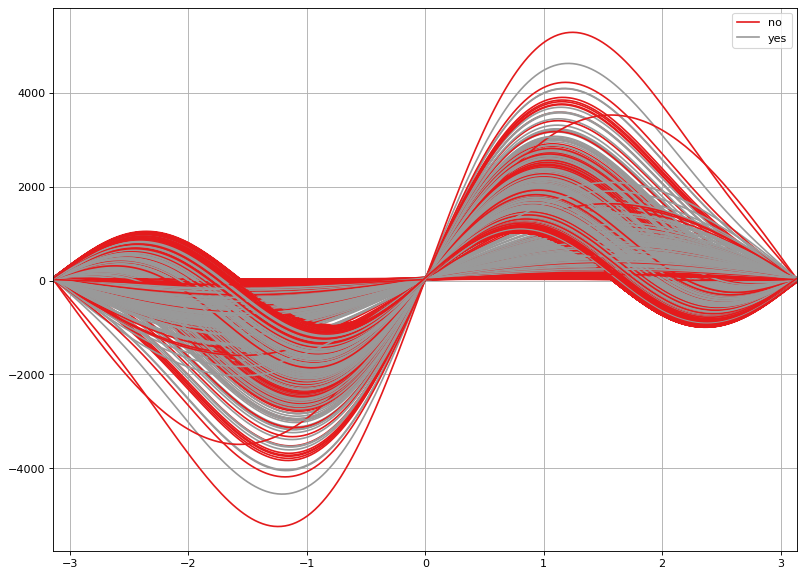

In [ ]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(12,9), dpi= 80)
dfg = df[["age","duration","campaign","pdays","previous","y"]]
andrews_curves(dfg, 'y', colormap='Set1')
plt.show()

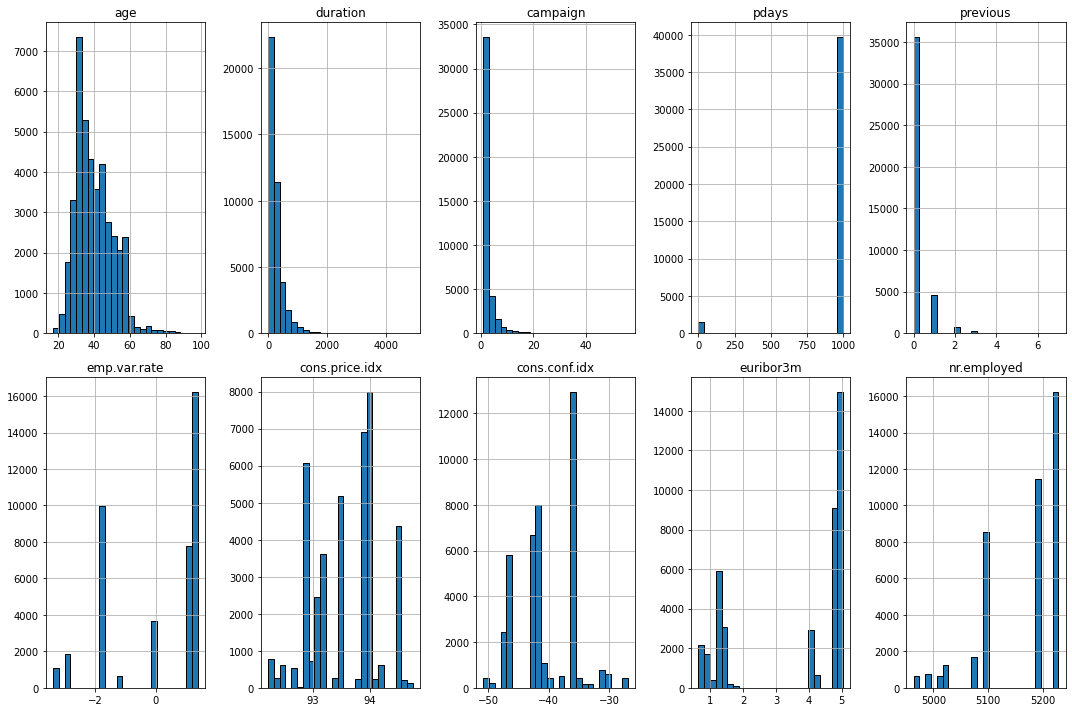

In [ ]:
df.hist(bins=25, figsize=(15, 10), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

In [ ]:
plt.figure(figsize=(15,15), dpi= 80)
sns.pairplot(df, kind="scatter", hue="y")
plt.show()

Heatmap :

*   Overview of dependency of y on each continuous variable
*   Got list of highly correlated features

using threshold value = 0.7 : (nr.employed , emp.var.rate) (nr.employed , euribor3m) (emp.var.rate , euribor3m) (emp.var.rate , cons.price.idx)





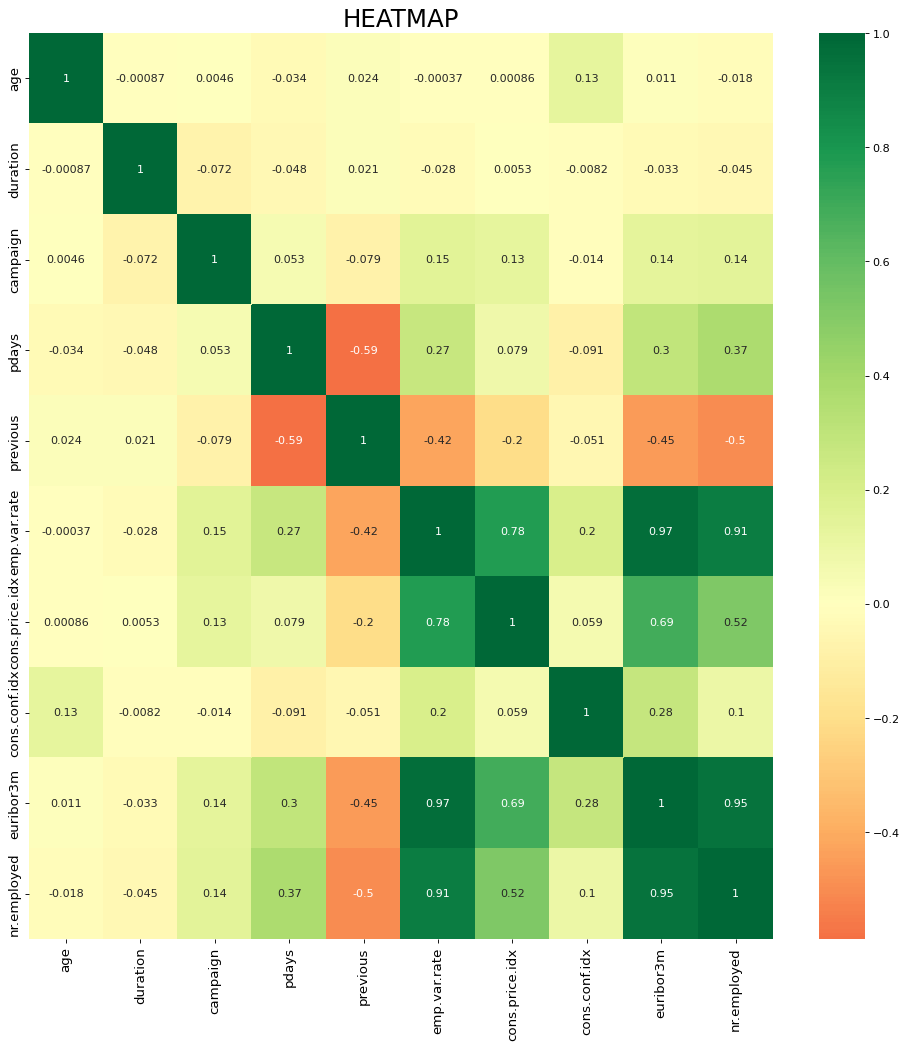

In [ ]:
# Heatmap Plot for correlations
plt.figure(figsize=(15,15), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('HEATMAP', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# Resizing plots
plt.figure(figsize=(14,14), dpi= 80)

SyntaxError: ignored

Heatmap :

*   Shows number of null values in each feature
*   feature 'default' could be removed pertaining to high number of null values it contains.



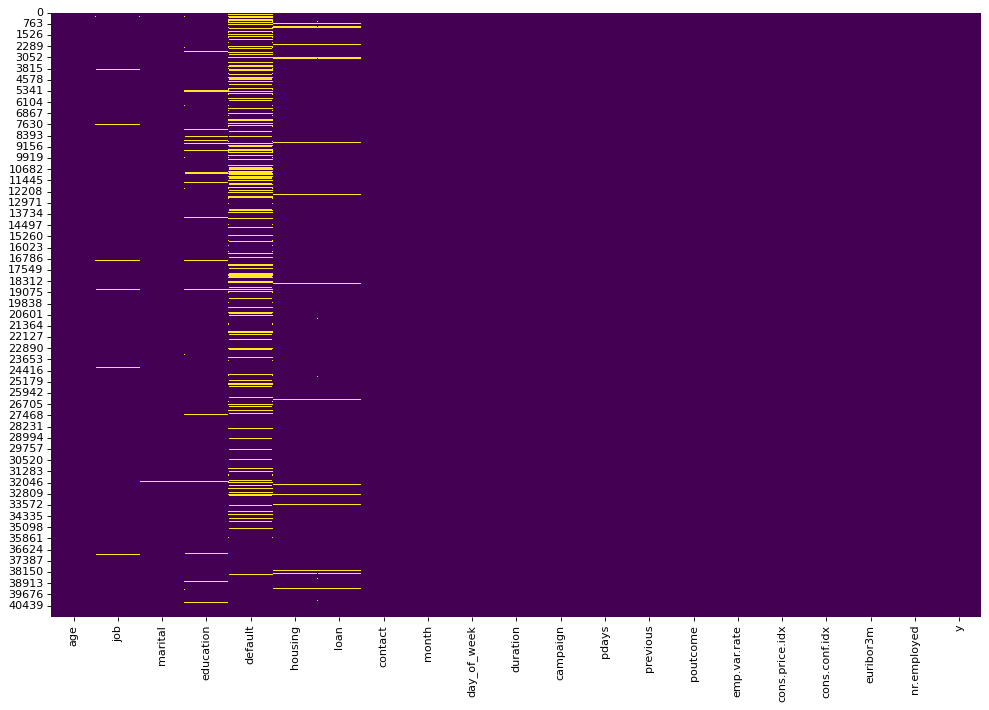

In [ ]:
plt.figure(figsize=(15,10), dpi= 80)
dfq = df.replace(r'unknown', np.nan, inplace=True)
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

### **AGE**

Age doesnt seem to have any particular effect on the output

In [ ]:
# AGE MIGHT/MIGHT NOT HAVE EFFECT ON OUTPUT(MOSTLY DEPENDS UPON COUNTRY)
palette = ['plum','b']
sns.boxplot(x='age', y='y', data=df,palette=palette, notch=False)
plt.show()

### **JOB**

Unknowns should be imputed by some method. Since no job category has clear majority, dropping any wont be feasible

In [ ]:
df['job'].unique()

In [ ]:
sns.catplot("y", col="job", col_wrap=4,data=df,kind="count", height=3.5, aspect=.8, palette=sns.color_palette(['red', 'blue']))

In [ ]:
import squarify
dfr = df[df['y']=='yes']
dfb = dfr.groupby('job').size().reset_index(name='counts')
labels = dfb.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = dfb['counts'].values.tolist()
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, alpha=.8)

# Decorate
plt.show()

In [ ]:
df['job'].value_counts()

### **MARITAL**

No particular marital status has clear majority in determining y

In [ ]:
sns.catplot("y", col="marital", col_wrap=4,data=df,kind="count", height=3.5, aspect=.8, palette=sns.color_palette(['red', 'blue']))

### **EDUCATION**

No particular education level has clear majority in determining y

In [ ]:
sns.catplot("y", col="education", col_wrap=4,data=df,kind="count", height=3.5, aspect=.8, palette=sns.color_palette(['red', 'blue']))

### **DEFAULT**

This feature should be dropped since it has high amount of unknown(null) values

In [ ]:
sns.catplot("y", col="default", col_wrap=4,data=df,kind="count", height=3.5, aspect=.8, palette=sns.color_palette(['red', 'blue']))

### **HOUSING**

No dominance of neither 'yes' nor 'no' housing loan

In [ ]:
sns.catplot("y", col="housing", col_wrap=4,data=df,kind="count", height=3.5, aspect=.8, palette=sns.color_palette(['red', 'blue']))

### **LOAN**

In [ ]:
sns.catplot("y", col="loan", col_wrap=4,data=df,kind="count", height=3.5, aspect=.8, palette=sns.color_palette(['red', 'blue']))

### **CONTACT**

No significant domination by any category

In [ ]:
sns.catplot("y", col="contact", col_wrap=4,data=df,kind="count", height=3.5, aspect=.8, palette=sns.color_palette(['red', 'blue']))

### **MONTH**

Seeing imbalances in the bars, month might be an important feature for determination of y

In [ ]:
sns.catplot("y", col="month", col_wrap=4,data=df,kind="count", height=3.5, aspect=.8, palette=sns.color_palette(['red', 'blue']))

### **DAY OF WEEK**

Wont have any significant effect on output

In [ ]:
sns.catplot("y", col="day_of_week", col_wrap=4,data=df,kind="count", height=3.5, aspect=.8, palette=sns.color_palette(['red', 'blue']))

### **DURATION**

This feature should be discarded as mentioned in PS

In [ ]:
sns.kdeplot(df.loc[(df['y']=='no'),'duration'], color='deeppink',label='NO', shade=True)
sns.kdeplot(df.loc[(df['y']=='yes'),'duration'], color='dodgerblue',label='YES', shade=True)
plt.legend()
plt.show()

### **CAMPAIGN**

Approximately normal distribution
No particular dominance on no or yes

In [ ]:

sns.boxplot(x='campaign', y='y', data=df, notch=False)
plt.show()

In [ ]:
sns.kdeplot(df.loc[(df['y']=='no'),'campaign'], color='deeppink',label='NO', shade=True)
sns.kdeplot(df.loc[(df['y']=='yes'),'campaign'], color='dodgerblue',label='YES', shade=True)
plt.legend()
plt.show()

### **PDAYS**



*   Approximately normal distribution
*    No particular dominance on no or yes



Looking at the number of 999(null) values, its better to encode the feature with Previous contact yes or no

In [ ]:
df['pdays'].value_counts()

In [ ]:
dfq = df[df['pdays'] != 999]
sns.kdeplot(dfq.loc[(dfq['y']=='no'),'pdays'], color='deeppink', shade=True, Label='NO')
sns.kdeplot(dfq.loc[(dfq['y']=='yes'),'pdays'], color='dodgerblue', shade=True, Label='YES')
plt.legend()
plt.show()

In [ ]:
dfw = df[df['pdays'] == 999]
dfw['y'].value_counts()

### **PREVIOUS**

Difference in two curves concludes tis feature to be a significant predictor

In [ ]:
sns.kdeplot(df.loc[(df['y']=='no'),'previous'], color='deeppink', shade=True, Label='NO')
sns.kdeplot(df.loc[(df['y']=='yes'),'previous'], color='dodgerblue', shade=True, Label='YES')
plt.legend()
plt.show()

### **POUTCOME**

Since the feature is dominated by nonexistent, this feature can be dropped

In [ ]:
sns.catplot("y", col="poutcome", col_wrap=4,data=df,kind="count", height=3.5, aspect=.8, palette=sns.color_palette(['red', 'blue']))

### **EMP.VAR.RATE**

no is dominant for range (0.5 , 2) but overall data is unbiased

In [ ]:
sns.kdeplot(df.loc[(df['y']=='no'),'emp.var.rate'], color='deeppink', shade=True, Label='NO')
sns.kdeplot(df.loc[(df['y']=='yes'),'emp.var.rate'], color='dodgerblue', shade=True, Label='YES')
plt.legend()
plt.show()

In [ ]:
categories = np.unique(df['y'])
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('emp.var.rate','y',data=df.loc[df.y==category, :], 
                s=20,label=str(category))
plt.legend(fontsize=12)    
plt.show()  

### **CONS.PRICE.IDX**

no is dominant for range (93.65 , 94.3) but overall data is unbiased

In [ ]:
sns.kdeplot(df.loc[(df['y']=='no'),'cons.price.idx'], color='deeppink', shade=True, Label='NO')
sns.kdeplot(df.loc[(df['y']=='yes'),'cons.price.idx'], color='dodgerblue', shade=True, Label='YES')
plt.legend()
plt.show()

In [ ]:
categories = np.unique(df['y'])
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('cons.price.idx','y',data=df.loc[df.y==category, :], 
                s=20,label=str(category))
plt.legend(fontsize=12)    
plt.show()  

### **CONS.CONF.IDX**

Alternating dominance in different intervals, could be assumed approximately unbiased

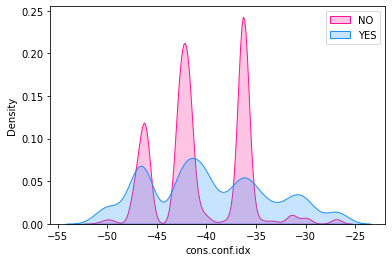

In [ ]:
sns.kdeplot(df.loc[(df['y']=='no'),'cons.conf.idx'], color='deeppink', shade=True, Label='NO')
sns.kdeplot(df.loc[(df['y']=='yes'),'cons.conf.idx'], color='dodgerblue', shade=True, Label='YES')
plt.legend()
plt.show()

No significant outlier seen

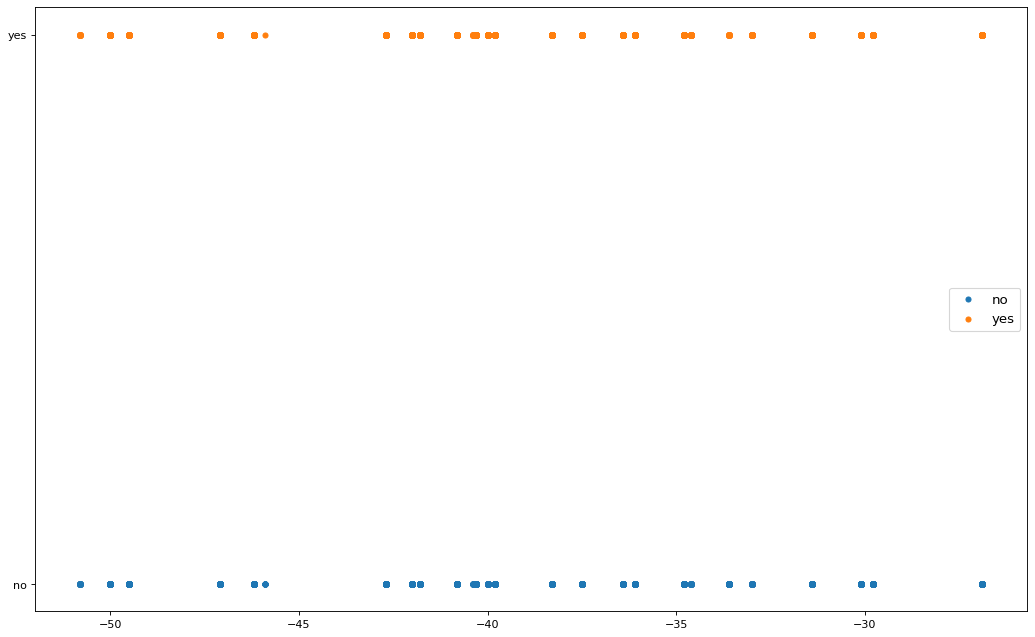

In [ ]:
categories = np.unique(df['y'])
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('cons.conf.idx','y',data=df.loc[df.y==category, :], 
                s=20,label=str(category))
plt.legend(fontsize=12)    
plt.show()  

### **EURIBOR3M**

In [ ]:
sns.kdeplot(df.loc[(df['y']=='no'),'euribor3m'], color='deeppink', shade=True, Label='NO')
sns.kdeplot(df.loc[(df['y']=='yes'),'euribor3m'], color='dodgerblue', shade=True, Label='YES')
plt.legend()
plt.show()

In [ ]:
categories = np.unique(df['y'])
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('euribor3m','y',data=df.loc[df.y==category, :], 
                s=20,label=str(category))
plt.legend(fontsize=12)    
plt.show()  

### **NR.EMPLOYED**

Could be approximated as unbiased

In [ ]:
sns.kdeplot(df.loc[(df['y']=='no'),'nr.employed'], color='deeppink', shade=True, Label='NO')
sns.kdeplot(df.loc[(df['y']=='yes'),'nr.employed'], color='dodgerblue', shade=True, Label='YES')
plt.legend()
plt.show()

### **OUTCOME (Y)**

High difference between 2 category. Will affect generalisation approximation of the model

In [ ]:
sns.catplot(x='y', data=df, kind='count',palette=sns.color_palette(['red', 'blue']))
plt.show()

# **OUTLIER ANALYSIS**

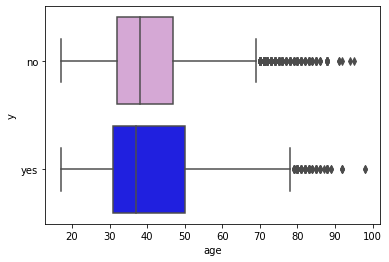

In [ ]:
palette = ['plum','b']
sns.boxplot(x='age', y='y', data=df,palette=palette, notch=False)
plt.show()

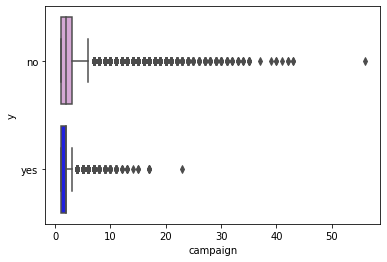

In [ ]:
palette = ['plum','b']
sns.boxplot(x='campaign', y='y', data=df,palette=palette, notch=False)
plt.show()

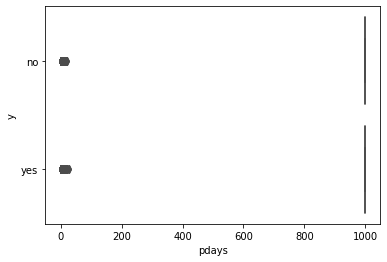

In [ ]:
palette = ['plum','b']
sns.boxplot(x='pdays', y='y', data=df,palette=palette, notch=False)
plt.show()

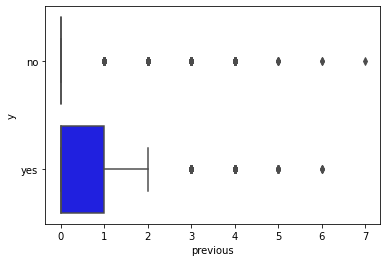

In [ ]:
palette = ['plum','b']
sns.boxplot(x='previous', y='y', data=df,palette=palette, notch=False)
plt.show()

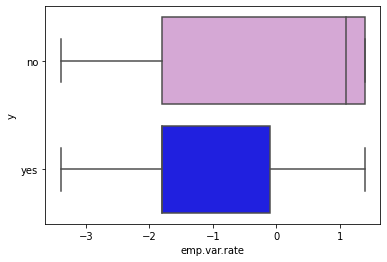

In [ ]:
palette = ['plum','b']
sns.boxplot(x='emp.var.rate', y='y', data=df,palette=palette, notch=False)
plt.show()

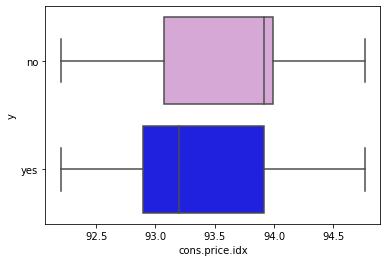

In [ ]:
palette = ['plum','b']
sns.boxplot(x='cons.price.idx', y='y', data=df,palette=palette, notch=False)
plt.show()

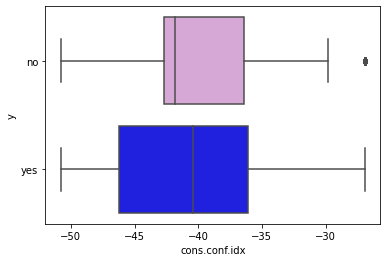

In [ ]:
palette = ['plum','b']
sns.boxplot(x='cons.conf.idx', y='y', data=df,palette=palette, notch=False)
plt.show()

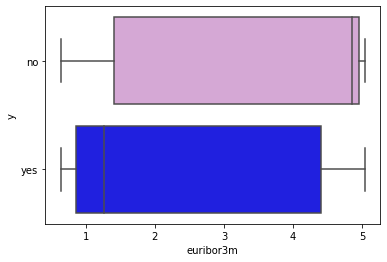

In [ ]:
palette = ['plum','b']
sns.boxplot(x='euribor3m', y='y', data=df,palette=palette, notch=False)
plt.show()

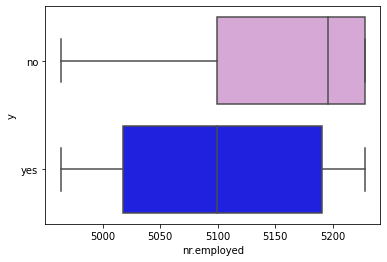

In [ ]:
palette = ['plum','b']
sns.boxplot(x='nr.employed', y='y', data=df,palette=palette, notch=False)
plt.show()

# **DATA PREPROCESSING**

Dropping features as decided in EDA

In [ ]:
# Replacing 'unknown' with null
df.replace(r'unknown', np.nan, inplace=True)

# Removing Correlated and unwanted features
df = df.drop(['duration','default','poutcome','pdays','nr.employed','euribor3m','contact','day_of_week','cons.price.idx'],axis=1)

Encoding categorical features

In [ ]:
# Imputing 'unknown' with Mode in marital column
df['marital'] = df['marital'].fillna(df['marital'].mode().iloc[0])
marital_enc = (df.groupby('marital').size()) / len(df)
df['marital_enc'] = df['marital'].apply(lambda x : marital_enc[x])
df = df.drop(['marital'],axis=1)

# Other encodings
df['housing'] = LabelEncoder().fit_transform(df['housing'])
df['loan'] = LabelEncoder().fit_transform(df['loan'])
df['y'] = LabelEncoder().fit_transform(df['y'])

df['month'].replace(['may', 'jun','jul','aug','nov','jan','feb','mar','apr','sep','oct','dec' ],[3,2,2,2,2,1,1,1,1,1,1,1], inplace=True)

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['education'] = imp.fit_transform(df['education'].values.reshape(-1,1))

df['education'].replace(['basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree' ],[1,2,3,4,0,6,5], inplace=True)

df['job'] = LabelEncoder().fit_transform(df['job'])

df.head(10)

,age,job,education,housing,loan,month,campaign,previous,emp.var.rate,cons.conf.idx,y,marital_enc
0,56,3,1,0,0,3,1,0,1.1,-36.4,0,0.607167
1,57,7,4,0,0,3,1,0,1.1,-36.4,0,0.607167
2,37,7,4,1,0,3,1,0,1.1,-36.4,0,0.607167
3,40,0,2,0,0,3,1,0,1.1,-36.4,0,0.607167
4,56,7,4,0,1,3,1,0,1.1,-36.4,0,0.607167
5,45,7,3,0,0,3,1,0,1.1,-36.4,0,0.607167
6,59,0,6,0,0,3,1,0,1.1,-36.4,0,0.607167
7,41,1,5,0,0,3,1,0,1.1,-36.4,0,0.607167
8,24,9,6,1,0,3,1,0,1.1,-36.4,0,0.280859
9,25,7,4,1,0,3,1,0,1.1,-36.4,0,0.280859


Scaling numerical features

In [ ]:
# Scaling Numerical Features
df['cons.conf.idx'] = StandardScaler().fit_transform(df['cons.conf.idx'].values.reshape(-1,1)) #Standardization
df['campaign'] = np.log(df['campaign']) # Log Transform
df['age'] = StandardScaler().fit_transform(df['age'].values.reshape(-1,1))  #Standardization

Balancing the class using SMOTE

In [ ]:
y = df[['y']].copy()
df = df.drop(['y'],axis=1)

# SMOTE
smote_technique = SMOTE(sampling_strategy='minority')
X_smt, y_smt = smote_technique.fit_resample(df, y)

# splitting into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.2, random_state=15, stratify=y_smt)

# **MODEL**

PREPARING PIPELINE

In [ ]:
# Initialzing the estimators
clf1 = RandomForestClassifier(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = GradientBoostingClassifier(random_state=42)

# Initiazing the hyperparameters for each dictionary

# Random Forest
param1 = {} 
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

# Decision Tree
param2 = {} 
param2['classifier__max_depth'] = [5,10,25,None]
param2['classifier__min_samples_split'] = [2,5,10]
param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param2['classifier'] = [clf2]

# Gradient Boost
param3 = {} 
param3['classifier__n_estimators'] = [10, 50, 100, 250]
param3['classifier__max_depth'] = [5, 10, 20]
param3['classifier'] = [clf3]

# Integrating pipeline
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3]

In [ ]:
# Train the grid search model
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='roc_auc').fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Precision: 0.9334473324213406
Test Precision: 0.9319723135006642
Test Precision: 0.9117647058823529
Test Recall: 0.9530959530959531
Test ROC AUC Score: 0.9342639854636707


In [ ]:
# Best performing model and its corresponding hyperparameters
print("Best Parameters :",gs.best_params_)
print()
# ROC-AUC score for the best model
print("Best Score after Cross Validation :",gs.best_score_)

# **PREDICTIONS**

In [ ]:
# _Predictions
y_pred = gs.predict(X_test)

In [ ]:
# Test data performance
print("Test Accuracy:",accuracy_score(y_pred, y_test))
print("Test F1 Score:",f1_score(y_pred, y_test))
print("Test Precision:",precision_score(y_pred, y_test))
print("Test Recall:",recall_score(y_pred, y_test))
print("Test ROC AUC Score:",roc_auc_score(y_pred, y_test))

In [ ]:
# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
# Classification Report
print(classification_report(y_test,y_pred))